In [2]:
import numpy as np # scientific computing
import pandas as pd # data loading and processing
import os # os operations
import matplotlib.pyplot as plt # for generating figures
import math
import matplotlib.dates as mdates
import seaborn as sns # for generating visualizations, better support with pandas than matplotlib

# Colorectal data analysis

In [200]:
pheno = pd.read_csv("LUAD_data_clinical_sample.txt", index_col = 0,header = 4, sep = "\t")

In [201]:
pheno

,SAMPLE_ID,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,TUMOR_TYPE,GRADE,TISSUE_PROSPECTIVE_COLLECTION_INDICATOR,TISSUE_RETROSPECTIVE_COLLECTION_INDICATOR,TISSUE_SOURCE_SITE_CODE,TUMOR_TISSUE_SITE,ANEUPLOIDY_SCORE,SAMPLE_TYPE,MSI_SCORE_MANTIS,MSI_SENSOR_SCORE,SOMATIC_STATUS,TMB_NONSYNONYMOUS,TISSUE_SOURCE_SITE
PATIENT_ID,,,,,,,,,,,,,,,,,
TCGA-05-4244,TCGA-05-4244-01,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Lung Adenocarcinoma (NOS),NaN,No,Yes,5,Lung,17.0,Primary,0.2886,0.03,Matched,6.400000,Indivumed
TCGA-05-4249,TCGA-05-4249-01,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Lung Adenocarcinoma (NOS),NaN,No,Yes,5,Lung,24.0,Primary,0.2807,0.07,Matched,10.000000,Indivumed
TCGA-05-4250,TCGA-05-4250-01,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Lung Adenocarcinoma (NOS),NaN,No,Yes,5,Lung,17.0,Primary,0.3059,0.28,Matched,10.500000,Indivumed
TCGA-05-4382,TCGA-05-4382-01,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,"Lung Adenocarcinoma, Mixed Subtype",NaN,No,Yes,5,Lung,22.0,Primary,0.3193,0.05,Matched,51.733333,Indivumed
TCGA-05-4384,TCGA-05-4384-01,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,"Lung Adenocarcinoma, Mixed Subtype",NaN,No,Yes,5,Lung,1.0,Primary,0.2850,0.00,Matched,3.966667,Indivumed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-17-Z045,TCGA-17-Z045-01,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Lung Adenocarcinoma,NaN,NaN,NaN,17,NaN,NaN,Primary,0.3020,0.00,Matched,20.200000,Washington University
TCGA-17-Z031,TCGA-17-Z031-01,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Lung Adenocarcinoma,NaN,NaN,NaN,17,NaN,NaN,Primary,0.3022,0.55,Matched,69.533333,Washington University
TCGA-17-Z049,TCGA-17-Z049-01,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Lung Adenocarcinoma,NaN,NaN,NaN,17,NaN,NaN,Primary,0.2793,0.19,Matched,16.433333,Washington University


In [155]:
# from UCSC xena
xena = pd.read_csv("TCGA.COADREAD.sampleMap_HiSeqV2",index_col=0, sep = "\t")
def pow_2(x):
    return 2**x
xena = xena.apply(pow_2)
xena.sort_index()
xena

,TCGA-CA-5256-01,TCGA-AZ-6599-01,TCGA-AA-3655-01,TCGA-A6-6137-01,TCGA-CK-4952-01,TCGA-A6-5657-01,TCGA-AD-6963-01,TCGA-AA-3663-11,TCGA-A6-6138-01,TCGA-A6-A567-01,...,TCGA-CI-6620-01,TCGA-AG-3725-01,TCGA-AH-6643-01,TCGA-DY-A0XA-01,TCGA-AF-3400-11,TCGA-EI-6506-01,TCGA-AF-2692-11,TCGA-AF-A56K-01,TCGA-DC-6154-01,TCGA-AG-3592-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,1145.371583,2227.484998,2083.076345,2131.421195,1515.943217,1368.993613,1863.113694,2126.551384,1324.837776,2919.083977,...,1922.809339,2458.734087,1310.498512,1442.844391,2710.418666,2554.455344,1702.925965,1686.246812,2599.827162,1752.623022
HIF3A,13.151906,5.076028,4.245104,67.457175,3.865353,44.560700,22.060598,349.512441,3.717416,26.860235,...,10.010208,2.689243,4.980187,8.583107,54.360997,8.004437,208.947980,105.595167,68.693420,34.003233
RNF17,1.000000,1.000000,1.463578,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
RNF10,1433.871476,3298.970130,2908.783085,3339.230575,3738.904742,2868.538170,2777.747986,3885.272304,3463.464089,2759.708171,...,2690.950243,4185.255549,3159.104619,2555.517933,4509.650772,2920.298242,3766.215926,2210.719087,3006.355704,2589.575669
RNF11,1464.000164,1335.347953,977.802985,1212.946329,925.250372,1158.225139,634.906351,2161.774014,1361.989627,1658.082412,...,822.459028,1297.033476,1137.144596,944.888312,1429.207822,1004.317700,2451.246746,779.173067,857.623127,620.978711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PTRF,713.712881,487.041197,1631.066627,1451.974096,1390.318785,5855.594763,1242.474046,10138.102255,2949.797084,2350.089523,...,6222.592259,696.944517,2551.093393,1261.828390,1753.959840,1713.820145,13868.267989,5008.628873,2692.256217,1860.016882
BCL6B,54.360997,29.531853,130.345774,122.377965,106.197059,212.099881,80.326271,131.689819,153.628280,112.712210,...,289.315539,58.855282,190.282622,97.052939,55.349562,157.991157,310.640043,394.587105,238.575155,133.333917
GSTK1,6003.965618,3107.847504,5443.428906,2410.137934,1511.850741,2666.256754,3709.219682,3588.586548,4336.453728,5125.226330,...,2898.719460,6361.273939,2937.147495,2677.925296,4224.310014,2162.973088,2698.047440,2452.776390,3605.041120,4600.898773


In [185]:
# from cbioportal
cbio = pd.read_csv("COADREAD_data_mrna_seq_v2_rsem.txt", index_col=0, sep = "\t")
cbio = cbio[cbio.index.notnull()]
cbio.sort_index()

,Entrez_Gene_Id,TCGA-3L-AA1B-01,TCGA-4N-A93T-01,TCGA-4T-AA8H-01,TCGA-5M-AAT4-01,TCGA-5M-AAT5-01,TCGA-5M-AAT6-01,TCGA-5M-AATA-01,TCGA-5M-AATE-01,TCGA-A6-2675-01,...,TCGA-AG-A01N-01,TCGA-AG-A01W-01,TCGA-AG-A01Y-01,TCGA-AG-A020-01,TCGA-AG-A025-01,TCGA-AG-A026-01,TCGA-AG-A02G-01,TCGA-AG-A02N-01,TCGA-AG-A02X-01,TCGA-AG-A032-01
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,1,22.1470,171.2680,20.9980,6.4587,14.8384,49.8017,21.4195,9.6107,22.1173,...,28.648632,14.213148,20.361928,4.479873,21.674028,18.887585,12.434922,6.936515,16.165630,22.836611
A1CF,29974,220.9870,100.6290,174.0080,151.4630,255.7150,0.0000,180.1190,106.4040,152.6630,...,355.438651,419.780727,19.486773,457.556518,182.038533,249.519138,238.629796,174.525498,191.864642,159.905526
A2BP1,54715,2.4178,10.1597,0.7311,1.7212,2.4731,3.2812,0.3976,7.5513,10.2495,...,3.491189,-0.330564,-0.330564,2.796757,0.296385,-0.330564,-0.330564,1.183092,75.017749,23.387740
A2LD1,87769,177.4080,371.3640,295.6750,127.4830,105.9410,90.1274,194.0600,160.3890,126.8730,...,51.486871,139.230385,172.838955,85.602168,280.602666,230.647330,282.865728,111.407100,70.135640,141.760142
A2M,2,15911.5000,1494.3300,1333.5700,2424.2600,2398.3400,7231.6500,8478.2800,4059.8400,11420.6000,...,5101.700157,2104.846555,3209.528006,1397.462448,4321.102468,4313.595650,1793.745097,2198.884111,1163.266249,2785.679374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11B,79699,543.0370,290.7600,669.7130,445.3530,550.5040,492.8330,477.5350,759.2480,716.9250,...,730.538983,866.110509,1281.631065,892.926058,623.683014,715.725841,417.929356,914.956269,544.076931,685.383167
ZYX,7791,6259.1900,4653.1200,4460.6100,4190.1900,3878.2600,6165.9900,4216.3000,5513.8100,5451.6500,...,5429.155709,5416.137978,9236.399494,2416.364270,3847.373320,3804.441217,3529.241972,2768.765832,5001.453757,4643.428584
ZZEF1,23140,1358.3200,1220.1300,3002.0100,1093.3700,1016.4300,1390.5600,744.3340,733.1620,1631.2900,...,1057.025127,1016.476464,732.492887,1959.411854,1865.678814,1159.494367,1767.341263,1151.317795,1822.211921,2125.966458


In [158]:
ls1= cbio.index.to_list()
ls2 = xena.index.to_list()
print(len(ls1))
print(len(ls2))

ls3 = list(set(ls1).intersection(set(ls2)))
print(ls3)
print(len(ls3))


20518
20530
['FAM160B2', 'TBPL2', 'HTR3E', 'EIF3F', 'SLC9A2', 'DCLRE1B', 'RAB23', 'HOXA9', 'SLC39A6', 'OR4M1', 'COX6C', 'ZNF572', 'ADAR', 'CA4', 'ANK3', 'MUC1', 'HIST1H2BH', 'DDX3Y', 'GHRL', 'DCAF4L2', 'TCAM1P', 'TACO1', 'SRI', 'MARS', 'RFT1', 'CLIC5', 'PHLDB3', 'PRM3', 'PLAC8', 'KRT8', 'FARSA', 'GABRG2', 'PIGB', 'GLTPD2', 'PROP1', 'PRAMEF16', 'TTC3', 'BIN3', 'GRK1', 'COPS5', 'OR4D1', 'TECRL', 'STEAP1', 'DEFB109P1B', 'KRTAP9-9', 'ACN9', 'C21orf57', 'TTTY20', 'CD300LB', 'NPHP1', 'ZNF93', 'C10orf12', 'KIAA0922', 'SLC2A1', 'FAM115A', 'TNRC6A', 'AMAC1L2', 'CKAP4', 'KCNA4', 'VWA5B2', 'VPS26B', 'C20orf103', 'FIG4', 'CDKAL1', 'RBM7', 'FER', 'SLPI', 'PIK3R5', 'ZNF480', 'FAAH2', 'CNTN3', 'SEZ6', 'LGALS13', 'TFB1M', 'PACS2', 'GSX1', 'CAMK2B', 'EXOSC7', 'RPA4', 'TNFSF13', 'TRIOBP', 'ANKRD33', 'RNF25', 'C7orf59', 'MXRA5', 'DHRS2', 'SLC48A1', 'LOC154761', 'OR6B1', 'MXRA8', 'SLITRK6', 'C13orf37', 'ANKRD34A', 'C6orf15', 'SMARCA1', 'EXO1', 'MRFAP1', 'RAB7L1', 'DDX23', 'NEDD9', 'TUFM', 'PI4KAP1', 'NKAI

In [159]:
xena = xena.loc[ls3]
cbio = cbio.loc[ls3]

In [160]:
# get names of nrf2 target genes
nrf2_names = pd.read_csv("nrf2 target genes.csv", index_col=None, header= None).T
nrf2_names = nrf2_names.loc[0].to_list()

## Cbio analysis

In [161]:
cbio_filtered = cbio.loc[nrf2_names + ["RRM2B"]]
cbio_filtered = cbio_filtered.T
cbio_filtered = np.log10(cbio_filtered+1)
cbio_filtered


Hugo_Symbol,ABCC5,ADD3,APIP,ASF1A,AXIN2,BMP4,CAP2,CAT,CCDC104,CCDC53,...,PRRT1,PTGR1,SH3RF2,SRP9,SUB1,TBC1D14,TSEN2,TXNRD1,G6PD,RRM2B
TCGA-3L-AA1B-01,2.911324,3.716467,2.829098,2.456087,4.238438,3.529303,1.801946,3.100767,2.749681,2.860850,...,1.639020,2.817691,3.055531,3.532396,3.421408,3.421647,2.502721,3.370913,2.981787,2.723097
TCGA-4N-A93T-01,3.227617,3.589054,3.305846,2.537180,3.343726,2.324212,2.117735,3.212297,2.667865,2.728048,...,1.690685,2.763503,3.454116,3.541513,3.469138,3.233179,2.726473,3.510479,2.951142,2.544438
TCGA-4T-AA8H-01,3.203715,3.410951,3.295846,2.429095,3.804389,3.102382,1.193753,3.361666,2.709939,2.699917,...,1.637544,2.530855,3.199725,3.533994,3.341891,3.291051,2.628444,3.429649,2.973696,2.816964
TCGA-5M-AAT4-01,3.038139,3.422027,2.924581,2.597705,3.387123,2.831960,1.360686,3.005999,3.090180,2.515903,...,1.360686,2.710886,2.918493,3.443413,3.585506,3.427577,2.766448,3.326199,3.227640,2.761944
TCGA-5M-AAT5-01,2.903518,3.399961,2.952559,2.584139,3.758978,2.624206,1.366565,3.323064,2.807213,2.526789,...,1.056406,2.640729,3.220221,3.557471,3.164974,3.337819,2.813529,3.499224,2.993560,2.569918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-AG-A026-01,2.946121,3.610935,2.545690,2.627957,3.967100,3.386701,2.208528,3.371171,2.576290,2.560780,...,1.618837,2.446892,2.911654,3.601614,3.582052,3.370704,2.755443,3.261204,2.975971,2.934523
TCGA-AG-A02G-01,2.824814,3.686401,2.461734,2.752719,3.290960,2.752721,1.485362,3.245769,2.623288,2.610060,...,1.669108,2.502364,2.868880,3.545609,3.619053,3.332206,2.431239,3.222424,2.957886,2.805684
TCGA-AG-A02N-01,2.633416,3.633205,2.603881,2.775062,3.214676,2.410820,1.521519,3.270068,2.648844,2.629540,...,0.881854,2.568316,3.184912,3.675200,3.635804,3.275430,2.595511,3.605936,2.651225,3.133341
TCGA-AG-A02X-01,3.010452,3.391178,2.546911,2.682684,3.099717,3.052653,1.581971,2.598357,2.489067,2.323011,...,1.534128,1.932687,2.957810,3.616592,3.703131,3.263822,2.546245,3.474935,3.092538,2.438242


In [162]:
info = cbio_filtered.describe().T
info.head()

,count,mean,std,min,25%,50%,75%,max
Hugo_Symbol,,,,,,,,
ABCC5,592.0,2.765749,0.198794,1.798916,2.655123,2.769237,2.885200,3.288551
ADD3,592.0,3.536110,0.211207,2.222902,3.431674,3.554312,3.672320,4.152402
APIP,592.0,2.716866,0.264288,1.792732,2.537310,2.684759,2.884554,3.607083
ASF1A,592.0,2.627959,0.210977,0.324737,2.536369,2.640631,2.748472,3.261917
AXIN2,592.0,3.459234,0.431605,1.684149,3.256332,3.562862,3.757701,4.361119


<AxesSubplot:xlabel='mean', ylabel='Count'>

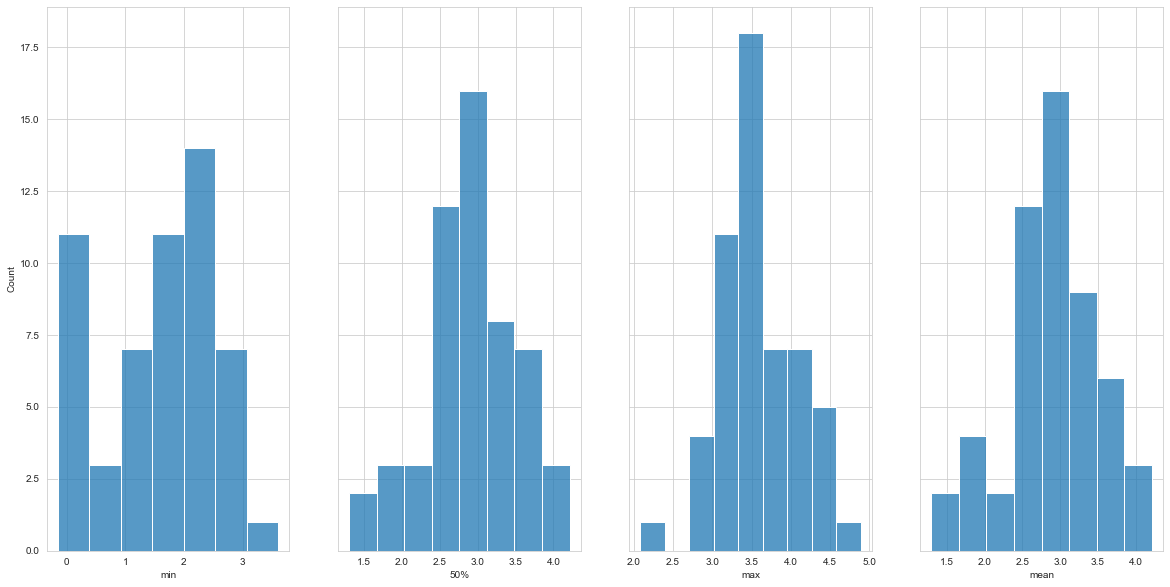

In [163]:
fig, axs = plt.subplots(1, 4, figsize=(20, 10), sharey=True)
sns.histplot(info, x="min",ax= axs[0])
sns.histplot(info, x="50%",ax= axs[1])
sns.histplot(info, x="max",ax= axs[2])
sns.histplot(info, x="mean",ax= axs[3])

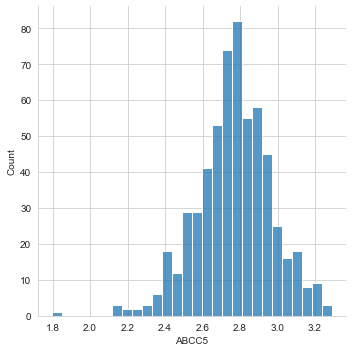

In [165]:

sns.displot(cbio_filtered, x="ABCC5")

In [166]:
# for each sequenced gene were rescaled to set the median equal to 1
data=((cbio_filtered-cbio_filtered.median())/cbio_filtered.std())+1
data_info = data.describe().T
data_info.head()

,count,mean,std,min,25%,50%,75%,max
Hugo_Symbol,,,,,,,,
ABCC5,592.0,0.982453,1.0,-3.881027,0.425966,1.0,1.583327,3.612316
ADD3,592.0,0.913820,1.0,-5.303802,0.419347,1.0,1.558728,3.831763
APIP,592.0,1.121482,1.0,-2.375204,0.442088,1.0,1.755973,4.489838
ASF1A,592.0,0.939933,1.0,-9.976982,0.505814,1.0,1.511148,3.944796
AXIN2,592.0,0.759901,1.0,-3.352855,0.289791,1.0,1.451430,2.849512


In [167]:
# data = data.T
data.head()

Hugo_Symbol,ABCC5,ADD3,APIP,ASF1A,AXIN2,BMP4,CAP2,CAT,CCDC104,CCDC53,...,PRRT1,PTGR1,SH3RF2,SRP9,SUB1,TBC1D14,TSEN2,TXNRD1,G6PD,RRM2B
TCGA-3L-AA1B-01,1.714744,1.767750,1.546140,0.125286,2.565266,2.188946,0.964729,-0.022255,1.134081,2.109407,...,2.155466,1.352867,1.381721,0.612962,0.655528,2.183727,1.303027,0.735569,0.920074,0.618978
TCGA-4N-A93T-01,3.305797,1.164494,3.350033,0.509658,0.492276,-0.947278,1.828318,0.615727,0.756600,1.505928,...,2.332092,1.091824,3.328564,0.665061,0.886289,0.662241,2.464223,1.660784,0.752126,-0.023717
TCGA-4T-AA8H-01,3.185565,0.321230,3.312198,-0.002652,1.559603,1.077893,-0.698497,1.470156,0.950720,1.378091,...,2.150419,-0.028925,2.086020,0.622094,0.271091,1.129440,1.955488,1.124943,0.875730,0.956650
TCGA-5M-AAT4-01,2.352663,0.373670,1.907423,0.796535,0.592824,0.374124,-0.241986,-0.564350,2.705068,0.541893,...,1.203934,0.838350,0.712374,0.104455,1.448887,2.231602,2.671679,0.439151,2.267472,0.758726
TCGA-5M-AAT5-01,1.675476,0.269196,2.013284,0.732234,1.454390,-0.166552,-0.225909,1.249347,1.399521,0.591361,...,0.163698,0.500376,2.186128,0.756255,-0.584246,1.506989,2.916013,1.586168,0.984595,0.067943


In [168]:
# # HIF-activity was quantified by averaging the normal- ized expression of 44 target genes
# rrm2b = data.loc[["RRM2B"]]
# g6pd = data.loc[["G6PD"]]
# print(g6pd, rrm2b)

In [169]:
y, x = data.loc[:,"G6PD"].to_numpy(), data.loc[:,"RRM2B"].to_numpy()

#find line of best fit
a, b = np.polyfit(x, y, 1)

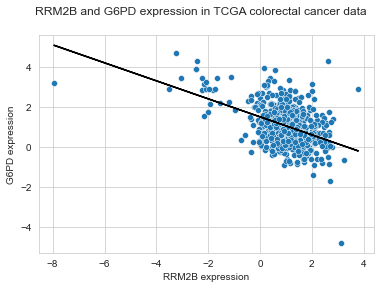

In [170]:

fig, axs = plt.subplots(1, 1, sharey=True)
sns.set_style("whitegrid")
sns.scatterplot(data=data, x="RRM2B", y="G6PD")
axs.set_ylabel("G6PD expression")
axs.set_xlabel("RRM2B expression")
fig.suptitle('RRM2B and G6PD expression in TCGA colorectal cancer data')
plt.plot(x, a*x+b, color="black")
plt.show()



In [171]:
y, x = data.loc[:,"G6PD"].to_numpy(), data.loc[:,"RRM2B"].to_numpy()
np.corrcoef(x, y)

array([[ 1.        , -0.45018395],
       [-0.45018395,  1.        ]])

Less RRM2B means more G6PD

## xena analysis

In [172]:
xena_filtered = xena.loc[nrf2_names + ["RRM2B"]]
xena_filtered = xena_filtered.T
xena_filtered = np.log10(xena_filtered+1)
xena_filtered


sample,ABCC5,ADD3,APIP,ASF1A,AXIN2,BMP4,CAP2,CAT,CCDC104,CCDC53,...,PRRT1,PTGR1,SH3RF2,SRP9,SUB1,TBC1D14,TSEN2,TXNRD1,G6PD,RRM2B
TCGA-CA-5256-01,2.740254,3.740377,3.106578,2.981253,3.922593,2.775142,1.040674,3.616318,3.104352,2.881218,...,0.862322,2.638204,3.023235,3.947395,3.938576,3.019957,2.493593,3.315183,2.808112,3.012438
TCGA-AZ-6599-01,2.432155,3.364469,3.024107,2.726222,3.555255,2.812951,0.909219,3.243696,2.598623,2.606371,...,1.539167,2.481591,3.021190,3.588239,3.274504,3.264515,2.454501,3.169087,2.740524,2.679294
TCGA-AA-3655-01,2.611776,3.642050,3.122490,2.365383,3.449868,3.402413,1.612188,3.426817,2.690770,2.621025,...,1.249514,2.826417,3.160062,3.650868,3.303057,3.339103,2.297908,3.364619,3.156572,2.699302
TCGA-A6-6137-01,3.112654,3.561274,3.138584,2.644811,4.086066,2.740945,1.579768,3.522633,2.527715,2.459600,...,1.535367,2.923399,3.163371,3.478787,3.268246,3.442886,2.815055,3.409605,3.042663,2.885968
TCGA-CK-4952-01,2.390144,3.495338,2.535909,2.363255,3.137621,3.099750,1.535776,3.090035,2.672745,2.492243,...,0.931919,2.521562,2.785240,3.657460,3.441953,3.267012,2.474151,3.578880,2.783197,2.753806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-EI-6506-01,2.783978,3.477523,2.835735,2.479941,3.687496,2.846616,1.748023,3.307691,2.621776,2.461190,...,1.294847,2.713182,3.079537,3.508970,3.370276,3.440208,2.337452,3.425824,3.072198,2.452431
TCGA-AF-2692-11,2.826868,3.498137,2.571631,2.522582,2.674007,2.312555,3.089162,3.475446,2.711800,2.514239,...,1.962479,2.809915,3.011987,3.467472,3.459587,3.316176,2.172393,3.472798,2.824824,2.872830
TCGA-AF-A56K-01,3.114549,3.413276,2.789658,2.562234,3.727615,2.710358,1.575401,3.250675,2.714534,2.522943,...,1.389920,2.752844,2.823561,3.427870,3.443639,3.248600,2.751793,3.328301,3.010543,2.908456
TCGA-DC-6154-01,2.830745,3.482970,2.771686,2.746324,3.474303,2.924001,2.031763,3.391279,2.835374,2.778298,...,1.169449,2.711830,2.884855,3.532173,3.459287,3.146194,2.836997,3.449266,3.027054,3.131545


In [173]:
info = xena_filtered.describe().T
info.head()

,count,mean,std,min,25%,50%,75%,max
sample,,,,,,,,
ABCC5,434.0,2.775438,0.197145,1.805771,2.682891,2.786367,2.888891,3.306547
ADD3,434.0,3.523097,0.167464,2.875355,3.434333,3.538312,3.631434,3.949472
APIP,434.0,2.720586,0.244040,2.167968,2.551300,2.681112,2.871282,3.607199
ASF1A,434.0,2.612803,0.137280,2.078519,2.529268,2.607512,2.692317,3.192070
AXIN2,434.0,3.388452,0.457262,1.693038,3.052671,3.506457,3.727819,4.361131


<AxesSubplot:xlabel='mean', ylabel='Count'>

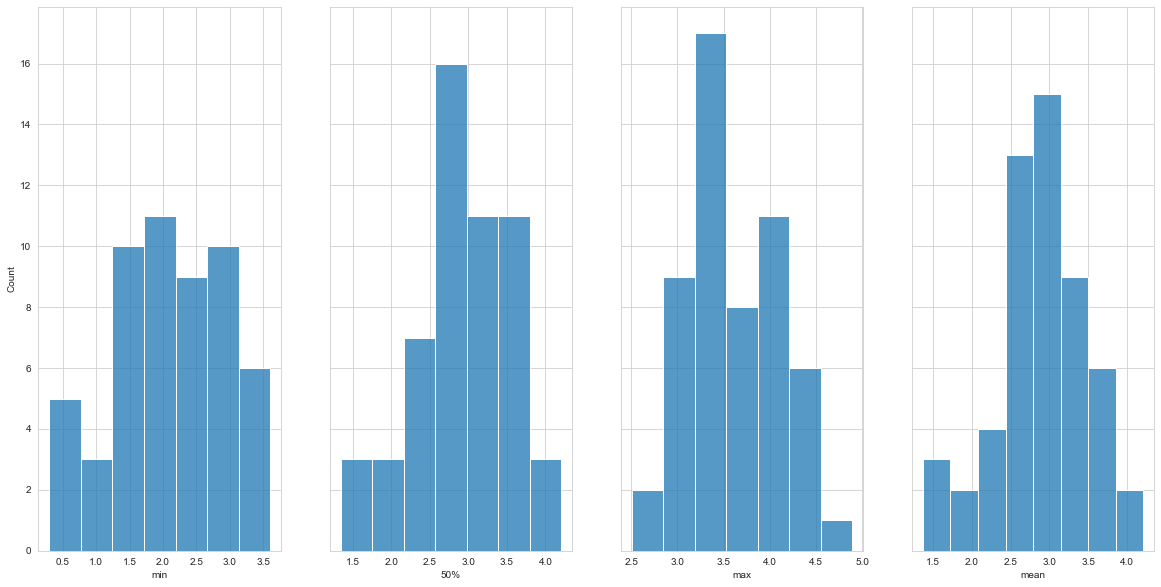

In [174]:
fig, axs = plt.subplots(1, 4, figsize=(20, 10), sharey=True)
sns.histplot(info, x="min",ax= axs[0])
sns.histplot(info, x="50%",ax= axs[1])
sns.histplot(info, x="max",ax= axs[2])
sns.histplot(info, x="mean",ax= axs[3])

In [175]:
# for each sequenced gene were rescaled to set the median equal to 1
data=((xena_filtered-xena_filtered.median())/xena_filtered.std())+1
data_info = data.describe().T
data_info.head()

,count,mean,std,min,25%,50%,75%,max
sample,,,,,,,,
ABCC5,434.0,0.944564,1.0,-3.973981,0.475129,1.0,1.520044,3.638565
ADD3,434.0,0.909145,1.0,-2.958794,0.379095,1.0,1.556070,3.455211
APIP,434.0,1.161753,1.0,-1.102702,0.468072,1.0,1.779258,4.794818
ASF1A,434.0,1.038547,1.0,-2.853379,0.430044,1.0,1.617753,5.258143
AXIN2,434.0,0.741930,1.0,-2.965819,0.007601,1.0,1.484101,2.869110


In [176]:
y, x = data.loc[:,"G6PD"].to_numpy(), data.loc[:,"RRM2B"].to_numpy()

#find line of best fit
a, b = np.polyfit(x, y, 1)

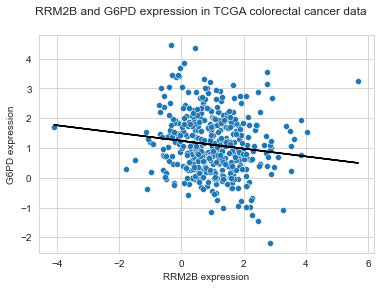

In [177]:

fig, axs = plt.subplots(1, 1, sharey=True)
sns.set_style("whitegrid")
sns.scatterplot(data=data, x="RRM2B", y="G6PD")
axs.set_ylabel("G6PD expression")
axs.set_xlabel("RRM2B expression")
fig.suptitle('RRM2B and G6PD expression in TCGA colorectal cancer data')
plt.plot(x, a*x+b, color="black")
plt.show()



In [178]:
y, x = data.loc[:,"G6PD"].to_numpy(), data.loc[:,"RRM2B"].to_numpy()
np.corrcoef(x, y)

array([[ 1.        , -0.13084074],
       [-0.13084074,  1.        ]])

# Pancancer data analysis

In [10]:
# load pancancer data
df = pd.read_csv("EB++AdjustPANCAN_IlluminaHiSeq_RNASeqV2.geneExp.xena", index_col=0, sep = "\t")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20531 entries, 100130426 to ZZZ3
Columns: 11069 entries, TCGA-OR-A5J1-01 to TCGA-CG-4477-01
dtypes: float64(11069)
memory usage: 1.7+ GB


In [11]:
# subset to get relevant genes
df_filtered = df.loc[["G6PD","RRM2B"]]
df_filtered.isnull().values.any()

False

In [12]:
# get phenotypes of samples
pheno = pd.read_csv("TCGA_phenotype_denseDataOnlyDownload.tsv", index_col=0, sep = "\t")
print(pheno.isnull().values.sum())
pheno_filtered = pheno.dropna()
print(pheno_filtered.dtypes)


144
sample_type_id      float64
sample_type          object
_primary_disease     object
dtype: object


In [13]:
# scale numerical data
df_filtered = df_filtered/math.log2(10)

# add the labels on which is normal vs cancer
df2 = pd.concat([df_filtered, pheno_filtered.T], join="inner")

In [14]:
# transpose to patient x gene
df2 = df2.T  

# drop normal samples
df2.drop(df2.loc[df2["sample_type"] == "Solid Tissue Normal"].index, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10323 entries, TCGA-OR-A5J1-01 to TCGA-CG-4477-01
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   G6PD              10323 non-null  object
 1   RRM2B             10323 non-null  object
 2   sample_type_id    10323 non-null  object
 3   sample_type       10323 non-null  object
 4   _primary_disease  10323 non-null  object
dtypes: object(5)
memory usage: 483.9+ KB


In [15]:
# cast object type to float type
df2 = df2.astype({'G6PD': 'float64', 'RRM2B': 'float64'})
df2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10323 entries, TCGA-OR-A5J1-01 to TCGA-CG-4477-01
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   G6PD              10323 non-null  float64
 1   RRM2B             10323 non-null  float64
 2   sample_type_id    10323 non-null  object 
 3   sample_type       10323 non-null  object 
 4   _primary_disease  10323 non-null  object 
dtypes: float64(2), object(3)
memory usage: 483.9+ KB


In [16]:
# get the data for the two genes
data = df2[['G6PD', 'RRM2B']]

# for each sequenced gene were rescaled to set the median equal to 1
data=(data-data.median()+1)/data.std()

data.head() # patient x gene

,G6PD,RRM2B
TCGA-OR-A5J1-01,3.328192,5.839423
TCGA-OR-A5J2-01,3.553074,3.452574
TCGA-OR-A5J3-01,4.536934,4.326964
TCGA-OR-A5J5-01,4.134020,1.892851
TCGA-OR-A5J6-01,2.915907,4.067011


In [17]:
x, y = data["G6PD"].to_numpy(), data["RRM2B"].to_numpy()

#find line of best fit
a, b = np.polyfit(x, y, 1)

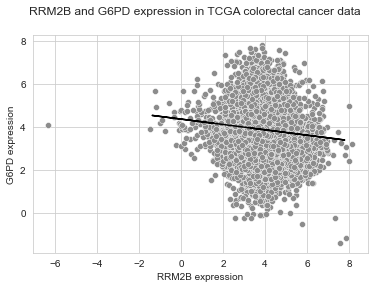

In [18]:

fig, axs = plt.subplots(1, 1, sharey=True)
sns.set_style("whitegrid")
sns.scatterplot(data=data, x="RRM2B", y="G6PD", color=".55", ax=axs)
axs.set_ylabel("G6PD expression")
axs.set_xlabel("RRM2B expression")
fig.suptitle('RRM2B and G6PD expression in TCGA colorectal cancer data')

plt.plot(x, a*x+b, color="black")
plt.show()


In [19]:
X, y = data.loc[:,"G6PD"].to_numpy(), data.loc[:,"RRM2B"].to_numpy()
np.corrcoef(X, y)

array([[ 1.       , -0.1243346],
       [-0.1243346,  1.       ]])

In [20]:
patients = data.index.to_list()

## Add NRF2 dimension

In [21]:
# get names of nrf2 target genes
nrf2_names = pd.read_csv("nrf2 target genes.csv", index_col=None, header= None).T
nrf2_names = nrf2_names.loc[0].to_list()

In [22]:
# get nrf2 target genes
nrf2 = df.loc[nrf2_names]

# get only patients with cancer samples
nrf2 = nrf2[patients]

nrf2.head()


,TCGA-OR-A5J1-01,TCGA-OR-A5J2-01,TCGA-OR-A5J3-01,TCGA-OR-A5J5-01,TCGA-OR-A5J6-01,TCGA-OR-A5J7-01,TCGA-OR-A5J8-01,TCGA-OR-A5J9-01,TCGA-OR-A5JA-01,TCGA-OR-A5JB-01,...,TCGA-CG-4449-01,TCGA-CG-4462-01,TCGA-CG-4465-01,TCGA-CG-4466-01,TCGA-CG-4469-01,TCGA-CG-4472-01,TCGA-CG-4474-01,TCGA-CG-4475-01,TCGA-CG-4476-01,TCGA-CG-4477-01
sample,,,,,,,,,,,,,,,,,,,,,
ABCC5,10.25,10.57,10.36,10.81,9.53,11.39,9.79,9.91,10.04,10.08,...,9.56,9.86,8.89,8.16,10.12,10.48,10.38,9.03,10.68,9.71
ADD3,8.70,9.32,7.23,9.14,9.51,10.14,11.13,9.37,8.02,10.83,...,11.87,11.20,12.39,11.43,12.34,12.14,12.59,11.91,12.62,12.61
APIP,7.50,8.86,9.20,7.35,10.10,10.01,8.35,8.66,8.74,9.19,...,10.40,8.88,9.02,9.72,9.08,9.32,9.01,9.35,9.14,8.51
ASF1A,10.22,8.51,9.02,9.47,9.68,9.48,8.58,9.34,9.97,8.63,...,8.72,8.46,8.61,9.63,9.17,8.90,8.55,8.45,8.58,8.82
AXIN2,9.10,10.81,9.03,8.40,3.39,7.96,7.21,9.02,7.25,4.48,...,9.63,8.11,8.41,10.26,7.48,9.63,8.55,9.31,10.34,12.14


In [23]:
# scale numerical data to log10
nrf2 = nrf2/math.log2(10)

# for each sequenced gene were rescaled to set the median equal to 1
nrf2=(nrf2-nrf2.median()+1)/nrf2.std()
nrf2.describe()

# for each patient, average across all normalised expression values
nrf2 = nrf2.T
nrf2["NFE2L2"] = nrf2.mean(axis=1)
nrf2 = nrf2.T
nrf2.head() # genes x patients


,TCGA-OR-A5J1-01,TCGA-OR-A5J2-01,TCGA-OR-A5J3-01,TCGA-OR-A5J5-01,TCGA-OR-A5J6-01,TCGA-OR-A5J7-01,TCGA-OR-A5J8-01,TCGA-OR-A5J9-01,TCGA-OR-A5JA-01,TCGA-OR-A5JB-01,...,TCGA-CG-4449-01,TCGA-CG-4462-01,TCGA-CG-4465-01,TCGA-CG-4466-01,TCGA-CG-4469-01,TCGA-CG-4472-01,TCGA-CG-4474-01,TCGA-CG-4475-01,TCGA-CG-4476-01,TCGA-CG-4477-01
sample,,,,,,,,,,,,,,,,,,,,,
ABCC5,1.524739,1.689009,1.716779,2.614115,1.038127,1.831007,1.253215,1.476372,1.636834,1.297608,...,1.604735,1.903745,1.058797,0.833561,1.518192,1.826408,1.948518,1.067995,2.376094,1.650639
ADD3,0.917496,1.179894,0.405182,1.716205,1.031519,1.366466,1.732069,1.250328,0.803341,1.551250,...,2.744655,2.617931,2.570176,2.346243,2.477889,2.601432,3.087149,2.348560,3.478366,3.091625
APIP,0.447373,0.992540,1.230692,0.753775,1.226461,1.318154,0.738625,0.953122,1.100428,0.996620,...,2.019251,1.381431,1.114934,1.555207,1.068605,1.284825,1.242669,1.210280,1.501094,1.054369
ASF1A,1.512986,0.849988,1.155265,1.893636,1.087689,1.121189,0.820817,1.237770,1.607950,0.807234,...,1.190218,1.157582,0.937887,1.513574,1.107511,1.088735,1.005669,0.810103,1.182913,1.208405
AXIN2,1.074204,1.786759,1.159455,1.318329,-0.990596,0.556307,0.331242,1.103818,0.485624,-0.596252,...,1.639278,0.971041,0.851523,1.805008,0.376931,1.429559,1.005669,1.192494,2.182912,2.858085


In [24]:
print(nrf2.loc["NFE2L2"].T.describe()) # to get the interquartile range

# bin the patients into quartiles based on NRF2 activity
nrf2 = nrf2.T # patients x genes
nrf2["NRF2 activity"] = pd.cut(nrf2["NFE2L2"],
                bins=[ 0.408170, 1.225746, 1.616076, 2.409622],
                labels=["Bottom 25%", "-", "Top 25%"])
nrf2 = nrf2.T # genes x patients

# trabspose data to drop nan values
data = data.T # genes x patients
data = pd.concat([data, nrf2]).dropna(axis=1)


data.head()

count    10323.000000
mean         1.412701
std          0.283859
min          0.408170
25%          1.220605
50%          1.404850
75%          1.609079
max          2.409622
Name: NFE2L2, dtype: float64


,TCGA-OR-A5J1-01,TCGA-OR-A5J2-01,TCGA-OR-A5J3-01,TCGA-OR-A5J5-01,TCGA-OR-A5J6-01,TCGA-OR-A5J7-01,TCGA-OR-A5J8-01,TCGA-OR-A5J9-01,TCGA-OR-A5JA-01,TCGA-OR-A5JB-01,...,TCGA-VQ-AA6A-01,TCGA-VQ-AA6B-01,TCGA-VQ-AA6D-01,TCGA-VQ-AA6F-01,TCGA-VQ-AA6G-01,TCGA-VQ-AA6I-01,TCGA-VQ-AA6J-01,TCGA-VQ-AA6K-01,TCGA-ZA-A8F6-01,TCGA-ZQ-A9CR-01
G6PD,3.328192,3.553074,4.536934,4.13402,2.915907,3.693625,4.452603,6.420324,4.443233,4.293312,...,3.21575,2.466143,2.728505,3.815437,2.644174,4.13402,3.974728,3.328192,2.344331,3.590554
RRM2B,5.839423,3.452574,4.326964,1.892851,4.067011,3.015379,2.448207,4.787792,3.098092,4.456941,...,2.59,3.94885,4.315148,2.838138,2.790874,4.090643,4.055194,3.535287,4.00793,3.417126
ABCC5,1.524739,1.689009,1.716779,2.614115,1.038127,1.831007,1.253215,1.476372,1.636834,1.297608,...,1.773118,1.018267,1.033507,2.081693,1.261664,1.505689,1.338385,1.521618,1.643434,1.367987
ADD3,0.917496,1.179894,0.405182,1.716205,1.031519,1.366466,1.732069,1.250328,0.803341,1.55125,...,2.517955,2.627657,2.266541,2.215296,1.806366,2.151563,2.814691,2.685207,2.744903,2.225157
APIP,0.447373,0.99254,1.230692,0.753775,1.226461,1.318154,0.738625,0.953122,1.100428,0.99662,...,0.980086,1.102528,0.993408,1.171215,1.10834,0.851028,1.279918,1.456697,0.973819,1.180789


In [25]:
data = data.T # patients x genes

# split data into quartiles into different dataframe based on NRF2 activity
low = data.loc[data["NRF2 activity"] == "Bottom 25%"].drop(['NRF2 activity'], axis=1).astype(float)
med = data.loc[data["NRF2 activity"] == "-"].drop(['NRF2 activity'], axis=1).astype(float)
high = data.loc[data["NRF2 activity"] == "Top 25%"].drop(['NRF2 activity'], axis=1).astype(float)
data = data.drop(['NRF2 activity'], axis=1).astype(float)





In [38]:
data

,G6PD,RRM2B,ABCC5,ADD3,APIP,ASF1A,AXIN2,BMP4,CAP2,CAT,...,PRDX6,PRRT1,PTGR1,SH3RF2,SRP9,SUB1,TBC1D14,TSEN2,TXNRD1,NFE2L2
TCGA-OR-A5J1-01,3.328192,5.839423,1.524739,0.917496,0.447373,1.512986,1.074204,1.160393,0.870484,1.873414,...,2.641282,0.083027,0.937085,-1.797467,2.656953,1.701035,2.053628,0.705941,1.947850,1.206502
TCGA-OR-A5J2-01,3.553074,3.452574,1.689009,1.179894,0.992540,0.849988,1.786759,1.839707,1.355030,1.819342,...,2.674655,-0.909511,1.542384,0.067988,2.462863,1.851926,1.961894,0.638197,2.385477,1.242633
TCGA-OR-A5J3-01,4.536934,4.326964,1.716779,0.405182,1.230692,1.155265,1.159455,1.989155,1.063076,1.943061,...,2.957139,-0.554421,1.448593,-0.332329,2.412386,2.437529,2.152581,0.338136,2.676382,1.374375
TCGA-OR-A5J5-01,4.134020,1.892851,2.614115,1.716205,0.753775,1.893636,1.318329,1.796856,0.995727,2.167848,...,3.221682,1.463500,1.748465,-0.144134,3.141032,3.221682,3.167915,0.565591,3.146408,1.806885
TCGA-OR-A5J6-01,2.915907,4.067011,1.038127,1.031519,1.226461,1.087689,-0.990596,-0.941034,0.922483,1.708861,...,2.465502,-0.121615,1.507311,-1.899226,1.983102,1.847634,1.424708,0.483037,2.336642,0.998097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-VQ-AA6I-01,4.134020,4.090643,1.505689,2.151563,0.851028,0.952083,0.293028,0.758760,-0.084830,2.243831,...,2.305343,-0.431932,1.584776,1.558414,2.674414,2.300949,1.822036,0.807091,2.643658,1.441136
TCGA-VQ-AA6J-01,3.974728,4.055194,1.338385,2.814691,1.279918,1.153238,1.094770,1.440703,0.729348,1.932806,...,2.663650,-0.610534,1.328641,1.606362,2.761096,2.955988,2.225143,0.573434,3.204475,1.785793
TCGA-VQ-AA6K-01,3.328192,3.535287,1.521618,2.685207,1.456697,1.197012,1.077157,1.691412,0.577763,1.861206,...,2.540383,-0.510916,1.526612,1.776309,3.099704,2.320649,2.405546,0.368018,2.560358,1.677103
TCGA-ZA-A8F6-01,2.344331,4.007930,1.643434,2.744903,0.973819,0.808841,1.133944,1.264956,1.483309,2.274231,...,2.351868,0.328465,1.619173,1.657991,2.453766,2.211152,2.152924,0.401249,2.104401,1.564771


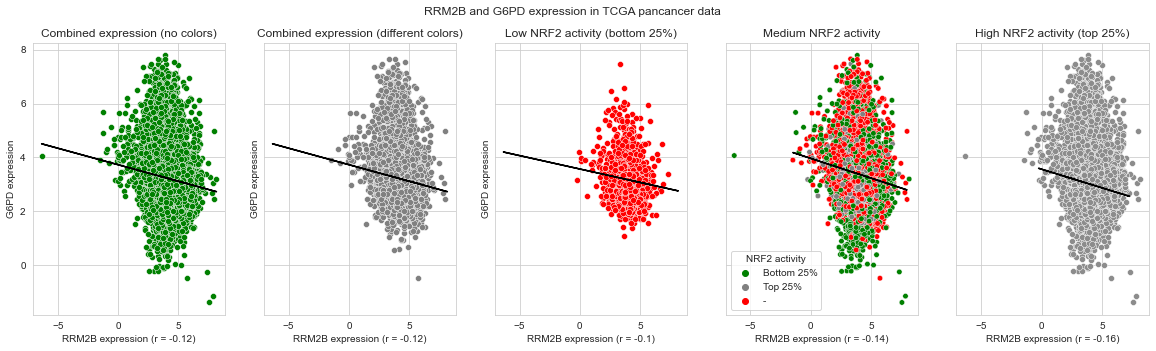

In [37]:
x, y = data["RRM2B"].to_numpy(), data["G6PD"].to_numpy()
a, b = np.polyfit(x, y, 1)
r = np.corrcoef(x, y)

fig, axs = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

sns.scatterplot(data=data, x="RRM2B", y="G6PD", color=".55", ax=axs[4])
axs[0].plot(x, a*x+b, color="black")
axs[0].set_title("Combined expression (no colors)")
axs[0].set_ylabel("G6PD expression")
axs[0].set_xlabel("RRM2B expression (r = " + str(round(r[0,1],2)) + ")")
# axs[0].set_xlim(-6.5, 8.5)
# axs[0].set_ylim(-1.5, 8)

sns.scatterplot(data=data, x="RRM2B", y="G6PD", hue = nrf2.loc["NRF2 activity"], palette=['green','gray','red'],s=30, ax=axs[3])
axs[1].plot(x, a*x+b, color="black")
axs[1].set_title("Combined expression (different colors)")
axs[1].set_ylabel("G6PD expression")
axs[1].set_xlabel("RRM2B expression (r = " + str(round(r[0,1],2)) + ")")
# axs[1].set_xlim(-6.5, 8.5)
# axs[1].set_ylim(-1.5, 8)

y, x = low["G6PD"].to_numpy(), low["RRM2B"].to_numpy()
a, b = np.polyfit(x, y, 1)
r = np.corrcoef(x, y)
sns.scatterplot(data=data, x="RRM2B", y="G6PD", color="green", ax=axs[0])
axs[2].plot(x, a*x+b, color="black")
axs[2].set_title("Low NRF2 activity (bottom 25%)")
axs[2].set_ylabel("G6PD expression")
axs[2].set_xlabel("RRM2B expression (r = " + str(round(r[0,1],2)) + ")")
# axs[2].set_xlim(-6.5, 8.5)
# axs[2].set_ylim(-1.5, 8)

y, x = med["G6PD"].to_numpy(), med["RRM2B"].to_numpy()
a, b = np.polyfit(x, y, 1)
r = np.corrcoef(x, y)
sns.scatterplot(data=med, x="RRM2B", y="G6PD", color="gray", ax=axs[1])
axs[3].plot(x, a*x+b, color="black")
axs[3].set_title("Medium NRF2 activity")
axs[3].set_ylabel("G6PD expression")
axs[3].set_xlabel("RRM2B expression (r = " + str(round(r[0,1],2)) + ")")
# axs[3].set_xlim(-6.5, 8.5)
# axs[3].set_ylim(-1.5, 8)

y, x = high["G6PD"].to_numpy(), high["RRM2B"].to_numpy()
a, b = np.polyfit(x, y, 1)
r = np.corrcoef(x, y)
sns.scatterplot(data=high, x="RRM2B", y="G6PD", color="red", ax=axs[2])
axs[4].plot(x, a*x+b, color="black")
axs[4].set_title("High NRF2 activity (top 25%)")
axs[4].set_ylabel("G6PD expression")
axs[4].set_xlabel("RRM2B expression (r = " + str(round(r[0,1],2)) + ")")
# axs[4].set_xlim(-6.5, 8.5)
# axs[4].set_ylim(-1.5, 8)





fig.suptitle('RRM2B and G6PD expression in TCGA pancancer data')

plt.show()


In [ ]:
X, y = data.loc[:,"G6PD"].to_numpy(), data.loc[:,"RRM2B"].to_numpy()
np.corrcoef(X, y)

-0.12274883 vs -0.1243346

Screening differentially regulated genes through a Signature Gene Screen (Including Heatmap Plot)
1. Normalise all values with (val-mean of that gene)/std of that gene
2. take an unweighted average across all genes for each patient

## RRM2B against NRF2 activity

In [ ]:
y, x = data["NFE2L2"].to_numpy(), data["RRM2B"].to_numpy()

#find line of best fit
a, b = np.polyfit(x, y, 1)

In [ ]:
fig, axs = plt.subplots(1, 1, sharey=True)
sns.set_style("whitegrid")
sns.scatterplot(data=data, x="RRM2B", y="NFE2L2", color="green", ax=axs)
plt.plot(x, a*x+b, color="black")
axs.set_ylabel("NRF2 activity (based on 53 genes)")
axs.set_xlabel("RRM2B expression")
fig.suptitle('TCGA pancancer data')
plt.show()

In [ ]:
np.corrcoef(x, y)

In [ ]:
data.shape